In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Knowing my data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 32','id'],inplace=True)  #dropping the columns that are not required at all
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.shape

(569, 31)

In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# What does the column name depict?

* Diagnosis (M = malignant, B = benign) 
* Radius (This is the mean distances from center to points on the perimeter) 
* Texture (This is the standard deviation of gray scale values) 
* Perimeter Area Smoothness (This is the local variation in radius lengths) 
* Compactness (This is the perimeter squared divided by the area and subtracted 1.0 from its value) (perimiter^2 / area - 10)
* Concavity (Severity of convace portions of the contour ) 
* Concave points (Number of concave portions of the contour ) 
* Symmetry Fractal dimension ("coastline approximation" -1)

*The mean, standard error and "worst" or largest which is actually the mean of the three largest values of these features were computed for each image, resulting in 30 features.* 

**This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant.**

In [8]:
# Describing the head of the loaded dataframe 
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Defining my X and Y values**

In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
X.shape

(569, 30)

In [11]:
y.shape

(569,)

**Data Analysis**

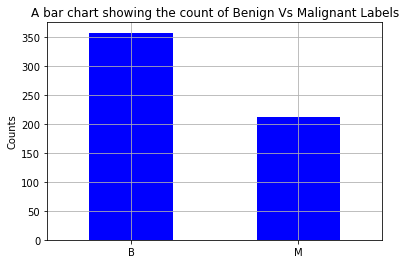

In [12]:
# Benign Vs Malignant
value_count = df['diagnosis'].value_counts()  
plt.figure()

# Plotting the Count for the value counts in the diagnosis column
value_count.plot(kind = "bar", color = "blue", rot=0)
plt.ylabel("Counts")
plt.title("A bar chart showing the count of Benign Vs Malignant Labels")
plt.grid(True)
plt.show()

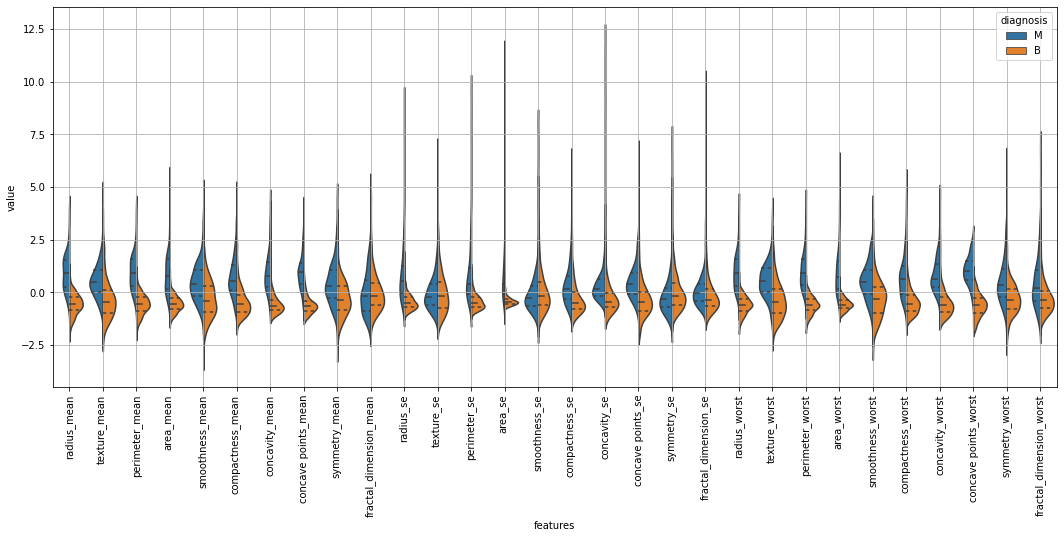

In [13]:
# Displaying a violin plot for all the features 
labels = y 
input_features = X

# Normalizing the dataframe 
data = (input_features - input_features.mean()) / (input_features.std())
input_features = pd.concat([y, data.iloc[:,:]], axis = 1)

data = pd.melt(input_features, id_vars = "diagnosis", var_name = "features", 
              value_name = "value")

# Plotting the first Ten feature
plt.figure(figsize = (18, 7))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data, split = True, 
              inner = "quart")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

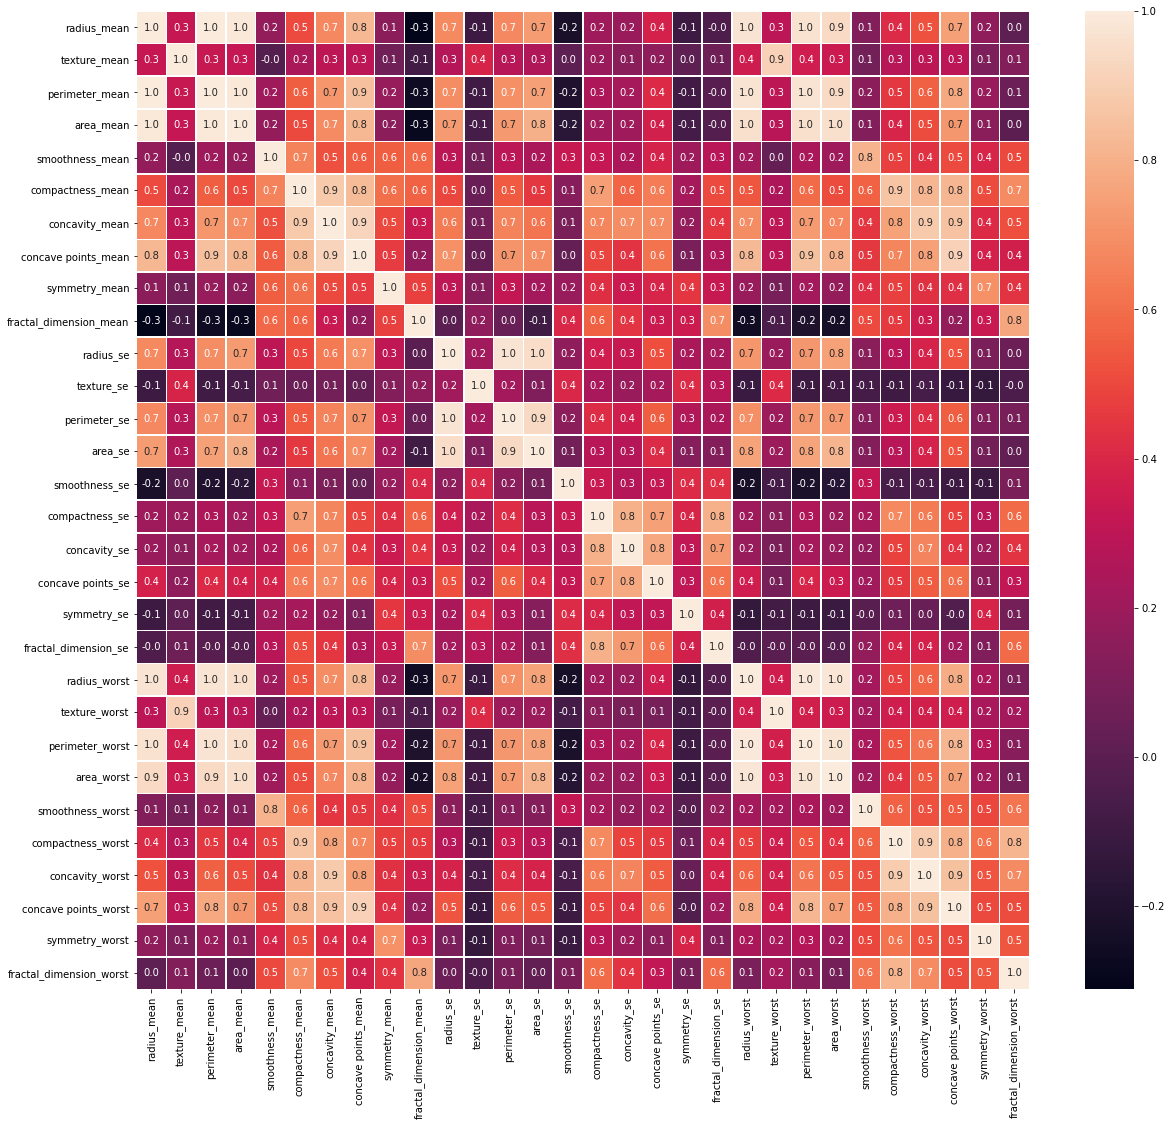

In [14]:
# Displaying a Correlation matrix of all the features of the breast cancer dataset.
f,ax = plt.subplots(figsize=(20, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

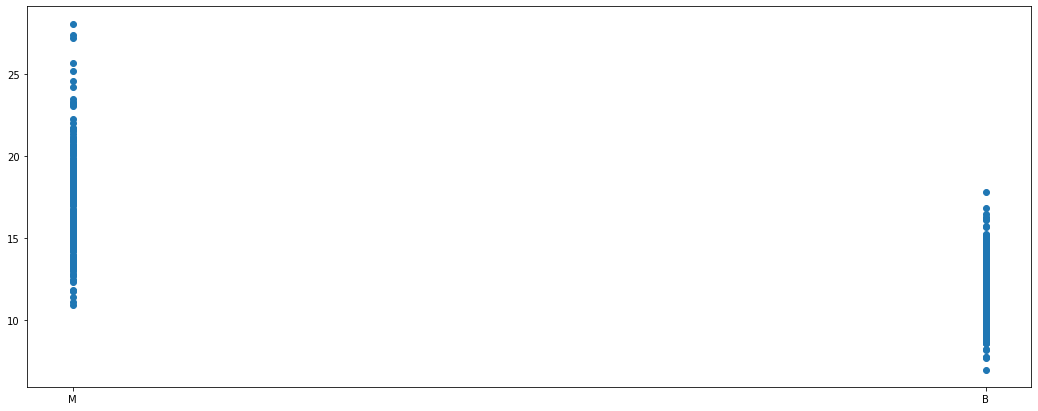

In [15]:
# Setting the figure of the Graph 
plt.figure(figsize=(18, 7))

# Plotting a scatter plot of diagnosis against radius_mean
plt.scatter(df['diagnosis'], df['radius_mean'])

# Displaying the graph 
plt.show()

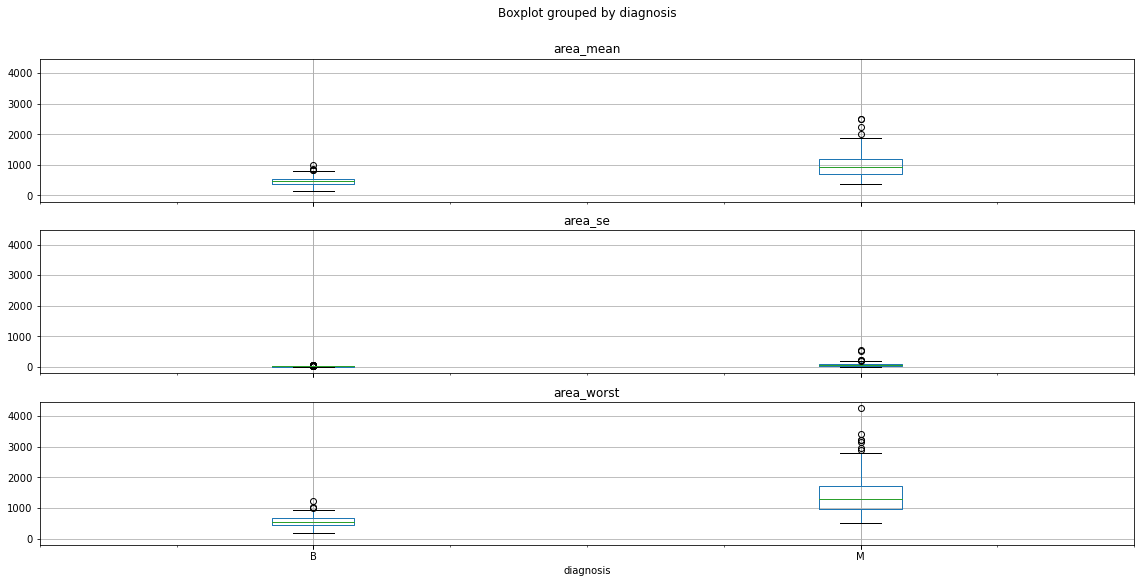

In [16]:
# Plotting a boxplot of the "Area_mean","area_se" and "area_worst"
boxplot = df.boxplot(column = ["area_mean","area_se","area_worst"], by="diagnosis", 
                    layout = (3, 1), figsize=(19, 9))
# Showing the boxplot
plt.show()

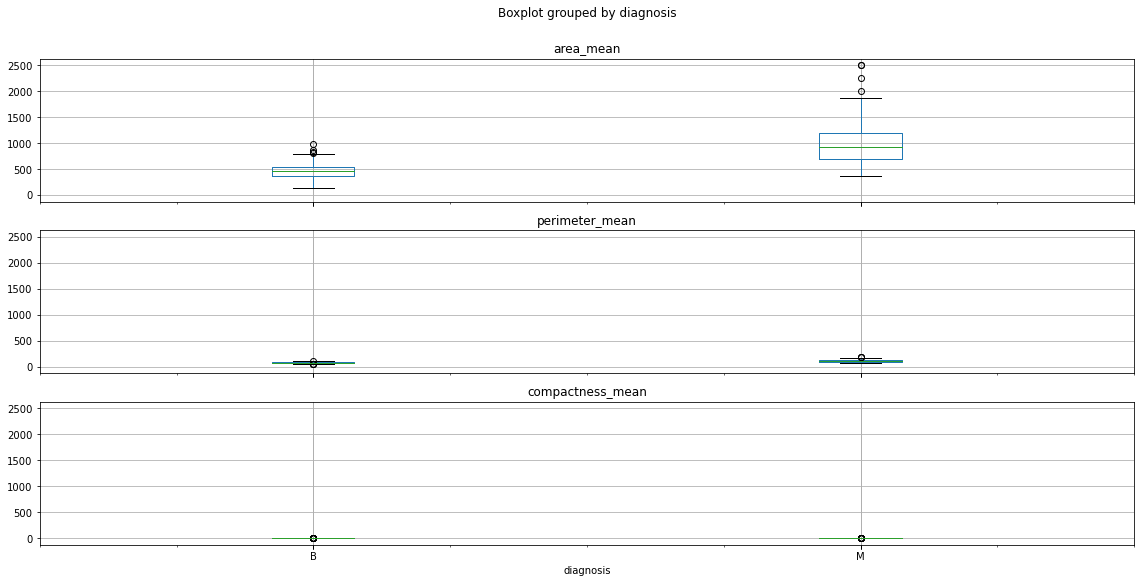

In [17]:
# Plotting a boxplot of the means of different features
boxplot = df.boxplot(column = ["area_mean","perimeter_mean","compactness_mean"], by="diagnosis", 
                    layout = (3, 1), figsize=(19, 9))
# Showing the boxplot
plt.show()

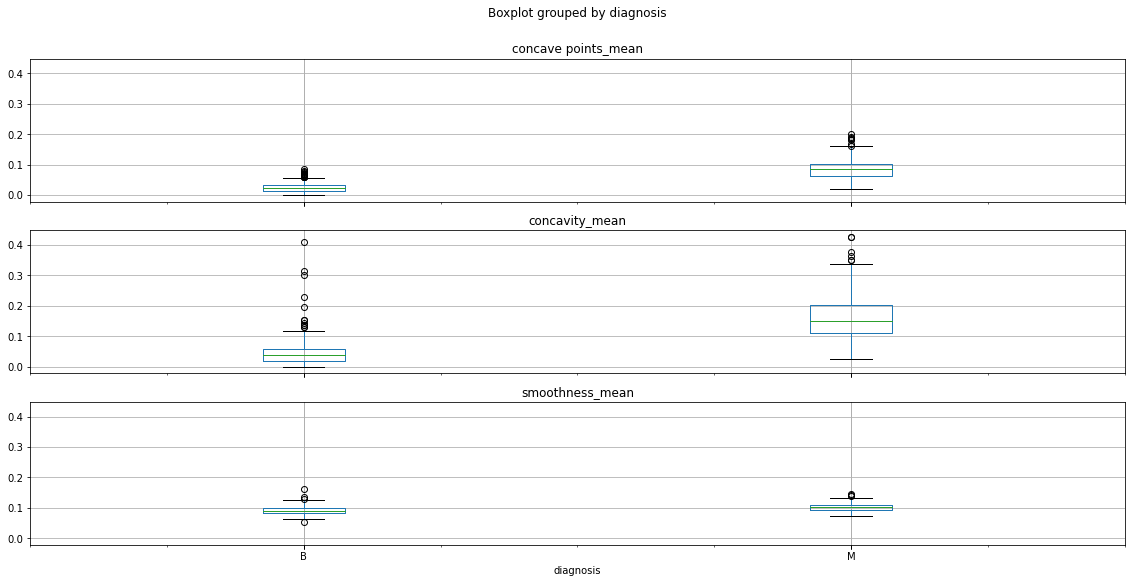

In [18]:
# Plotting a boxplot of the means of different features
boxplot = df.boxplot(column = ["concave points_mean","concavity_mean","smoothness_mean"], by="diagnosis", 
                    layout = (3, 1), figsize=(19, 9))
# Showing the boxplot
plt.show()

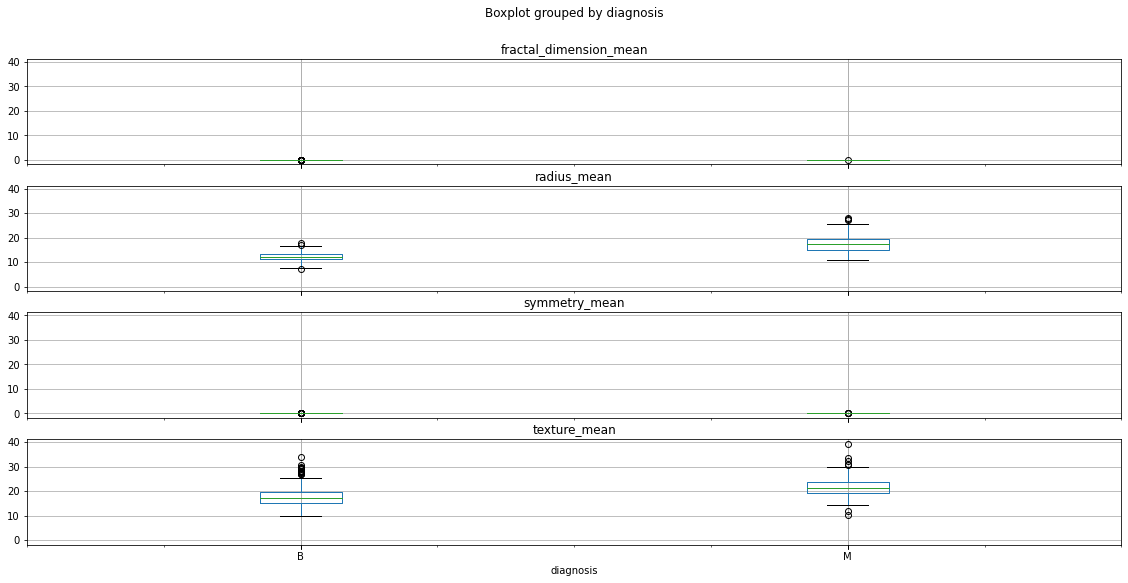

In [19]:
# Plotting a boxplot of the means of different features
boxplot = df.boxplot(column = ["fractal_dimension_mean","radius_mean","symmetry_mean","texture_mean"], by="diagnosis", 
                    layout = (4, 1), figsize=(19, 9))
# Showing the boxplot
plt.show()

**Getting inside our model**

**SVM**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [22]:
X_train.shape

(455, 30)

In [23]:
y_train.shape

(455,)

In [24]:
X_test.shape

(114, 30)

In [25]:
y_test.shape

(114,)

In [26]:
# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Import Library of Support Vector Machine model
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)


SVC(C=100, gamma=0.001)

In [28]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [29]:
# Calculating the accuracy
from sklearn.metrics import accuracy_score
acc_svm = round( accuracy_score(y_test, y_pred) * 100)
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  97.0


# The model is working at an accuracy of 97%

**This notebook is a part of task on SVM**